<h2 style="color:blue" align="center">Tensorboard demo using handwritten digits classification using neural network</h2>

In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [4]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [5]:
len(X_train)

60000

In [6]:
len(X_test)

10000

In [7]:
X_train[0].shape

(28, 28)

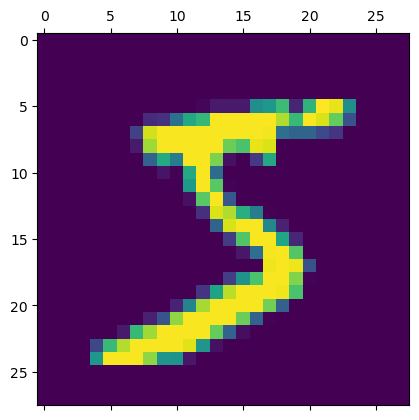

In [8]:
plt.matshow(X_train[0])

In [9]:
y_train[0]

5

In [10]:
X_train = X_train / 255
X_test = X_test / 255

In [11]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [12]:
X_train_flattened.shape

(60000, 784)

<h3 style='color:purple'>Using Flatten layer so that we don't have to call .reshape on input dataset</h3>

In [14]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/", histogram_freq=1)

model.fit(X_train, y_train, epochs=5, callbacks=[tb_callback])

C:\Users\sande\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.8724 - loss: 0.4575
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9609 - loss: 0.1362
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9720 - loss: 0.0923
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9792 - loss: 0.0696
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9837 - loss: 0.0509


In [33]:
%load_ext tensorboard
%tensorboard --logdir logs/

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Either run above inline magic or go to git bash or your command prompt and type below to run it,
`tensorboard --logdir logs/`
This will launch tensorboard at this url which you can open in your browser `http://localhost:6006/`

In [17]:
model.get_weights()

[array([[ 0.02944686, -0.02979247,  0.06428644, ...,  0.02470807,
          0.01821271, -0.04094965],
        [ 0.00905186, -0.05398232,  0.05824357, ...,  0.04085266,
         -0.07978293, -0.05656601],
        [ 0.04482231, -0.05596009,  0.07798733, ...,  0.04324931,
          0.0341525 , -0.08100031],
        ...,
        [-0.03103309, -0.03529457, -0.07243958, ..., -0.06694162,
         -0.0306807 ,  0.08087589],
        [-0.06226136,  0.00399752, -0.06382016, ..., -0.03818563,
          0.00354235, -0.05335978],
        [-0.07709587,  0.00551663, -0.04405988, ..., -0.04019331,
          0.01747588,  0.02177648]], dtype=float32),
 array([ 0.10720194,  0.05175034, -0.04314424, -0.02683038,  0.0361428 ,
         0.10691851,  0.03177337,  0.06748022,  0.01796151,  0.09514635,
         0.00208187, -0.02711419,  0.03091491,  0.05641231,  0.00328236,
         0.0720631 , -0.12402137,  0.03575311,  0.05919677,  0.01333102,
        -0.05688467, -0.0368162 , -0.03508095, -0.02473118,  0.048